<a href="https://colab.research.google.com/github/eldercamposds/TreinamentoModelosDeRegressao/blob/main/previs%C3%A3o_faturamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
import io

df = pd.read_csv(io.StringIO('''
ANO,FATURAMENTO
2021,"31331.00"
2022,"51795.00"
2023,"62095.00"
2024,"75671.00"
2025,"80513.33"
'''), header=0)

In [3]:
df.head()

,ANO,FATURAMENTO
0,2021,31331.00
1,2022,51795.00
2,2023,62095.00
3,2024,75671.00
4,2025,80513.33


# Sem LIB

In [4]:
class LinearRegressionCustom:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.__correlation_coef = self.__correlacao()
        self.__inclination = self.__inclinacao()
        self.__intercept = self.__interceptacao()

    def __correlacao(self):
      covariacao = np.cov(self.x, self.y, bias=True)[0][1]
      variancia_x = np.var(self.x)
      variancia_y = np.var(self.y)
      return covariacao / np.sqrt(variancia_x * variancia_y)

    def __inclinacao(self):
      stdx = np.std(self.x)
      stdy = np.std(self.y)
      return self.__correlation_coef * (stdy / stdx)

    def __interceptacao(self):
      mediax = np.mean(self.x)
      mediay = np.mean(self.y)
      return mediay - mediax * self.__inclination

    def previsao(self, valor):
        return self.__intercept + self.__inclination * valor

In [5]:
lr = LinearRegressionCustom(df["ANO"], df["FATURAMENTO"])

In [6]:
previsao = lr.previsao(2026)
print(f"Previsão de faturamento para o ano de 2026: {previsao:.2f}")

Previsão de faturamento para o ano de 2026: 96953.26


# Com LIB

## LinearRergession

In [7]:
X = df[["ANO"]]          # variável independente (ano)
y = df["FATURAMENTO"]    # variável dependente (faturamento)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = modelo.predict(X_test)

print("Previsões:", y_pred)
print("Erro quadrático médio:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Previsões: [46455.]
Erro quadrático médio: 28515600.0
R²: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [11]:
ano_futuro = np.array([[2026]])  # exemplo: prever para 2026
faturamento_previsto = modelo.predict(ano_futuro)
print("Faturamento previsto para 2026:", faturamento_previsto)


Faturamento previsto para 2026: [97487.264]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


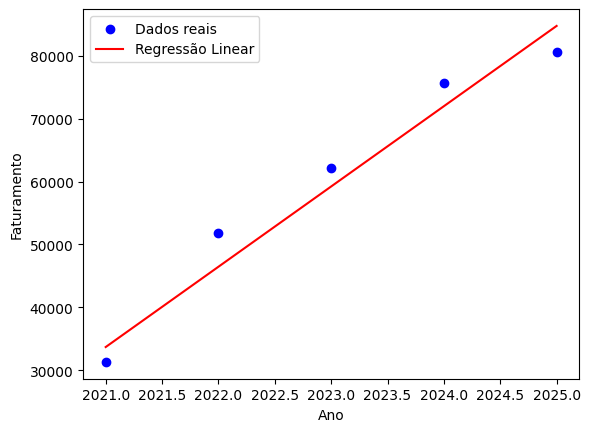

In [12]:
plt.scatter(X, y, color="blue", label="Dados reais")
plt.plot(X, modelo.predict(X), color="red", label="Regressão Linear")
plt.xlabel("Ano")
plt.ylabel("Faturamento")
plt.legend()
plt.show()


## StatsModels

In [13]:
df.head()

,ANO,FATURAMENTO
0,2021,31331.00
1,2022,51795.00
2,2023,62095.00
3,2024,75671.00
4,2025,80513.33


<Axes: >

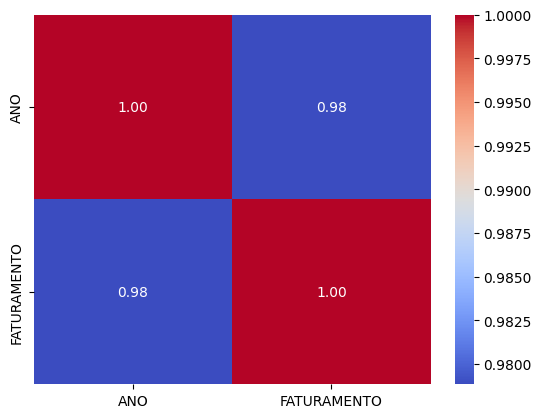

In [14]:
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt='.2f')


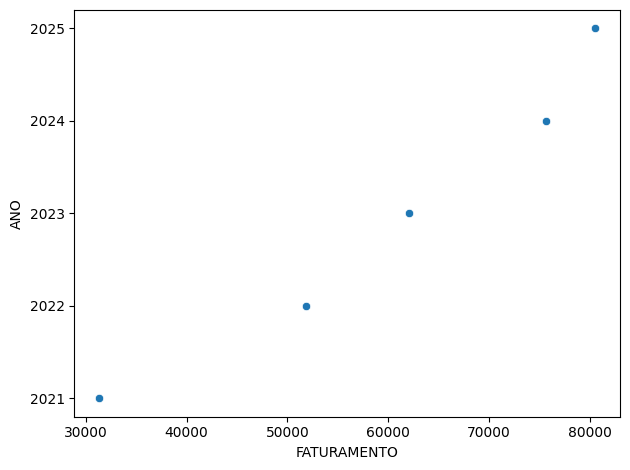

In [15]:
from matplotlib.ticker import MaxNLocator
sns.scatterplot(x="FATURAMENTO", y="ANO", data=df)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

In [16]:
modelo = sm.ols(formula= "FATURAMENTO ~ ANO", data=df)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            FATURAMENTO   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     68.62
Date:                Mon, 05 Jan 2026   Prob (F-statistic):            0.00369
Time:                        19:52:56   Log-Likelihood:                -48.058
No. Observations:                   5   AIC:                             100.1
Df Residuals:                       3   BIC:                             99.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.467e+07   2.99e+06     -8.264      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


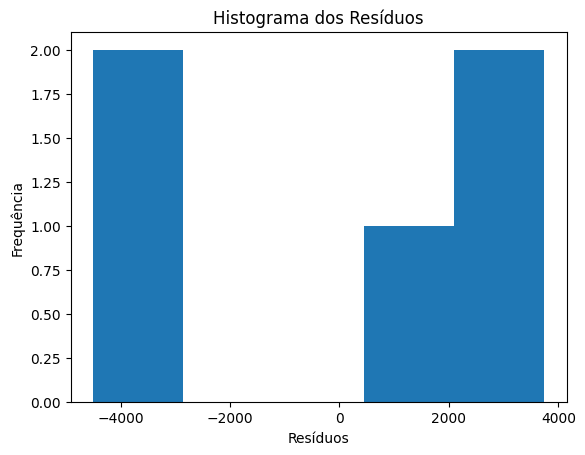

In [17]:
residuos = modelo.resid #residuos
plt.hist(residuos, bins=5)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos")
plt.show()

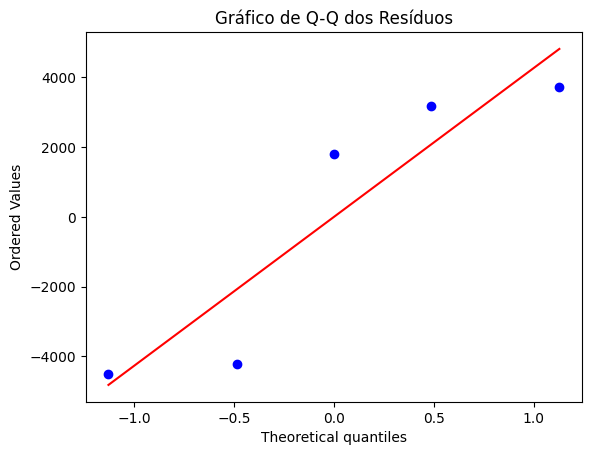

In [18]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico de Q-Q dos Resíduos")
plt.show()

In [19]:
stat, pval = stats.shapiro(residuos) #teste de shapiro

> h0 - dados normalmente distribuidos <br>
> p <= 0.05 rejeito a hipotese nula ( não está normalmente ditribuido)<br>
> p > 0.05 não tenho elementos para rejeitar a hipotese nula

In [20]:
print(f'Shapiro-Wilk Test Statistic: {stat:.3f}')
print(f'p-value: {pval}')

Shapiro-Wilk Test Statistic: 0.806
p-value: 0.0913487525106455


In [21]:
# A célula anterior que define 'modelo' (célula i4SIpdQJZYaZ) precisa ser alterada primeiro para:
# modelo = sm.ols(formula= "FATURAMENTO ~ ANO", data=df).fit()
# Depois de corrigir a definição do modelo, o código abaixo funcionará para prever o faturamento para 2026.
modelo.predict(pd.DataFrame({'ANO': [2026]}))

,0
0,96953.264
